In [61]:
import pandas as pd
import numpy as np

In [63]:
house = pd.read_csv("Bengaluru_House_Data.csv")

In [64]:
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [65]:
house.shape

(13320, 9)

In [66]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [67]:
house.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [68]:
house.area_type.isna().sum()

0

In [75]:
house.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [76]:
house.location.unique().shape

(1306,)

In [77]:
house['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [78]:
house['size'].unique().shape

(32,)

In [79]:
house['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [80]:
house['society'].unique().shape

(2689,)

In [81]:
house['society'].isna().sum()

5502

In [89]:
house.dropna(inplace = True)
# this removes all rows that contain at least one NaN.

In [90]:
house.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [91]:
house.shape

(7496, 9)

# we can't add categorical data to regression model

In [93]:
house.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

1 - 'Super built-up  Area'
2 - 'Plot  Area'
3 - 'Built-up  Area'
4 - 'Carpet  Area'

- Categorical 
    - Nominal: Unsortable   (no discrimination so if we code them 1/2/3/4 then model will discriminate by numbers as they are sortable)
    - Ordinal: Sortable

- Area_type is a nominal type!

- 
**So For Nominal data we go for get_dummies and for areatype it is only possible bcz it just has 4 unique values so max 4 columns will be added otherwise the width of our data will expand too much**


In [98]:
pd.get_dummies(house.area_type , dtype = int)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
3,0,0,0,1
5,0,0,0,1
11,0,0,1,0
...,...,...,...,...
13313,0,0,0,1
13314,0,0,0,1
13315,1,0,0,0
13317,1,0,0,0


### **every value gets the number based on exsistence and no order is accounted for**

In [101]:
encoded = pd.get_dummies(house, dtype = int)
encoded  # not a right approach

,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_15-Aug,availability_15-Dec,...,total_sqft_986,total_sqft_987,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_999
0,2.0,1.0,39.07,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.0,38.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,5.0,3.0,295.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,2.0,1.0,57.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,3.0,3.0,112.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,4.0,0.0,231.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,60.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
X = encoded.drop('price', axis = 1)
y = encoded['price']

print(X.shape)
print(y.shape)

(7496, 5003)
(7496,)


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 51)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5247, 5003)
(2249, 5003)
(5247,)
(2249,)


In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))

0.917345608592669
19.91056998100521


In [113]:
y_pred_test = model.predict(X_test)
print(r2_score(y_test, y_pred_test))
print(mean_absolute_error(y_test, y_pred_test))

-5.855550161036372e+26
875908699630547.4


### This is a Overfit Model 

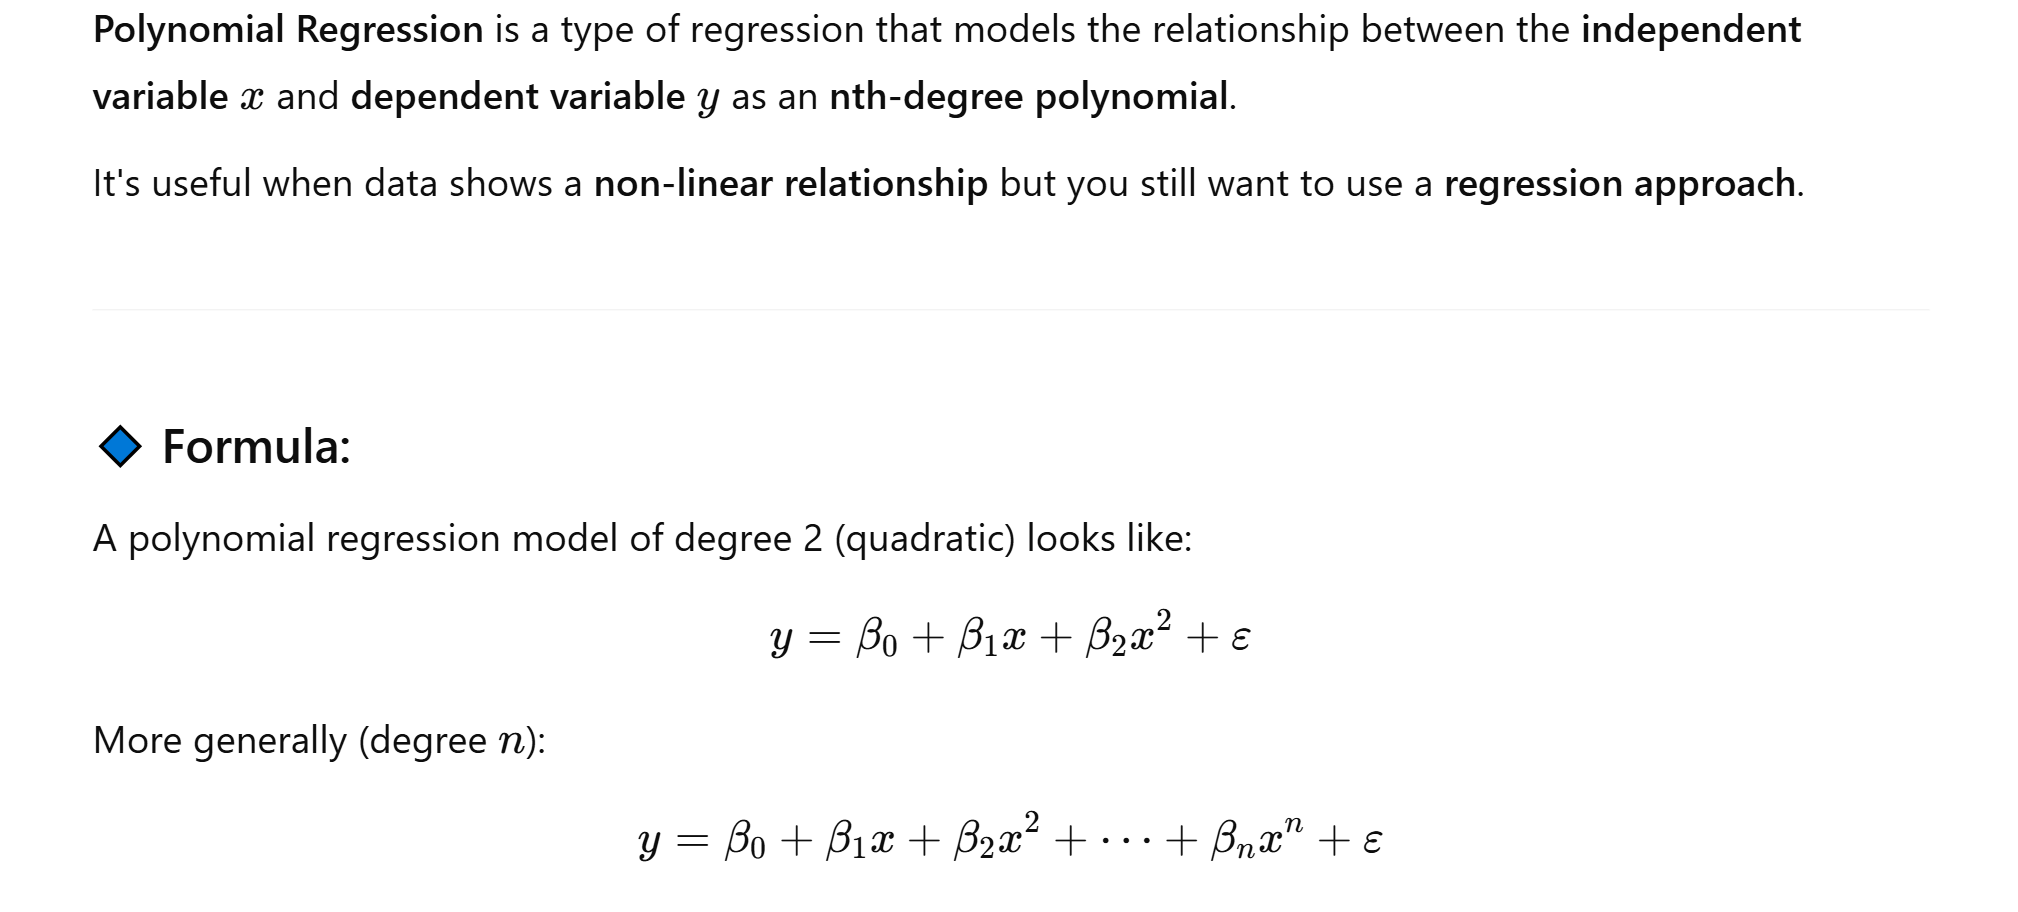

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [124]:
d=pd.DataFrame({'age':[23,34,12,34,23,35] , 'height':[5.4,5.6,5,6,4,4.5]})
d

,age,height
0,23,5.4
1,34,5.6
2,12,5.0
3,34,6.0
4,23,4.0
5,35,4.5


In [130]:
poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit(d)
td = poly_reg.transform(d)
columns = poly_reg.get_feature_names_out()
columns

array(['1', 'age', 'height', 'age^2', 'age height', 'height^2'],
      dtype=object)

In [132]:
df=pd.DataFrame(data=td,columns=columns)
df

,1,age,height,age^2,age height,height^2
0,1.0,23.0,5.4,529.0,124.2,29.16
1,1.0,34.0,5.6,1156.0,190.4,31.36
2,1.0,12.0,5.0,144.0,60.0,25.00
3,1.0,34.0,6.0,1156.0,204.0,36.00
4,1.0,23.0,4.0,529.0,92.0,16.00
5,1.0,35.0,4.5,1225.0,157.5,20.25


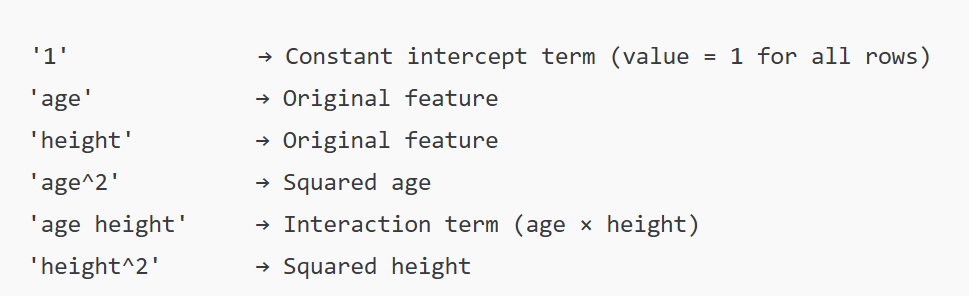

In [135]:
poly_reg = PolynomialFeatures(degree = 2, include_bias=False)  # removes intercept
poly_reg.fit(d)
td = poly_reg.transform(d)
columns = poly_reg.get_feature_names_out()
df=pd.DataFrame(data=td,columns=columns)
df

,age,height,age^2,age height,height^2
0,23.0,5.4,529.0,124.2,29.16
1,34.0,5.6,1156.0,190.4,31.36
2,12.0,5.0,144.0,60.0,25.00
3,34.0,6.0,1156.0,204.0,36.00
4,23.0,4.0,529.0,92.0,16.00
5,35.0,4.5,1225.0,157.5,20.25


In [137]:
# get back

poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit(X_train)

X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)


MemoryError: Unable to allocate 490. GiB for an array with shape (5247, 12522510) and data type float64

In [139]:
#  Unable to allocate 490. GiB for an array with shape (5247, 12522510) and data type float64  ERROR

In [141]:
# now we'll remove irrelevant columns and do feature engineering

In [145]:
house.drop("availability", axis=1,inplace = True)
house.drop("society", axis=1,inplace = True)

In [147]:
house['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [153]:
house["bhk"] = house['size'].apply(lambda x: x.split(" ")[0]).astype(int)  # extracted number from size column

In [155]:
house.drop("size", axis=1,inplace = True)

In [157]:
house

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2
11,Plot Area,Whitefield,2785,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...
13313,Super built-up Area,Uttarahalli,1345,2.0,1.0,57.00,3
13314,Super built-up Area,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2


In [201]:
house.dtypes

area_type      object
location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int32
dtype: object

In [207]:
house['total_sqft'].unique() 

array(['1056', '1170', '2785', '1540', '2800', '660', '1025',
       '2100 - 2850', '1760', '1693', '700', '1254', '1330.74', '1459',
       '2010', '1600', '5700', '2089', '1326', '1296', '1116', '1530',
       '2497', '1427', '3067 - 8156', '880', '950', '3050', '1020',
       '1735', '2050', '1500', '1060', '1152', '1350', '770', '2144',
       '1070', '1327', '1225', '1282', '589', '1787', '984', '1100',
       '910', '1108', '1295', '1035', '1866', '1017', '1069', '1349',
       '1863', '525', '1550', '1280', '1385', '1128', '1173', '630',
       '2483', '1050', '1800', '1145', '1910', '3252', '1419', '1346',
       '1220', '1130', '1040', '1195', '1599', '1150', '2400', '1135',
       '1195 - 1440', '3450', '595', '4144', '2100', '2230', '2500',
       '1249', '1133', '1090', '1920', '1720', '1260', '1120 - 1145',
       '1210', '1702', '1141', '35000', '1140', '1337', '1640', '1460',
       '1094', '805', '1155', '2280', '2225', '1185', '1101', '1650',
       '1556', '1179', '94

In [209]:
house['total_sqft'].isna().sum()

0

In [211]:
def convert_sqft(value):
    try:
        # Case 1: If it's a simple float (e.g., '2100')
        return float(value)
    except:
        # Case 2: If it's a range (e.g., '2100 - 2850')
        if '-' in value:
            parts = value.split('-')
            if len(parts) == 2:
                try:
                    return (float(parts[0].strip()) + float(parts[1].strip())) / 2
                except:
                    return None
        return None  # For anything else (e.g., '34.46Sq. Meter')

# Apply the function to the column
house['total_sqft'] = house['total_sqft'].apply(convert_sqft)


C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_12788\2294676195.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['total_sqft'] = house['total_sqft'].apply(convert_sqft)


In [235]:
house['total_sqft'].isna().sum()

2

In [239]:
house.dropna(inplace=True)
house['total_sqft'].isna().sum()

0

In [241]:
house.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int32
dtype: object

In [243]:
house['location'].value_counts()

location
Whitefield                  396
Sarjapur  Road              310
Electronic City             236
Kanakpura Road              216
Thanisandra                 211
Yelahanka                   160
Hebbal                      151
Raja Rajeshwari Nagar       135
Hennur Road                 122
Electronic City Phase II    119
Bannerghatta Road           108
Uttarahalli                 103
Name: count, dtype: int64

In [245]:
for a in house['location'].value_counts():
     print(a)

# now we are dropping the locations with lower counts as they don't show any patterns and has no sgnificant effect!

396
310
236
216
211
160
151
135
122
119
108
103


In [247]:
for a in house['location'].value_counts():
    if a>100:
       print(a)

396
310
236
216
211
160
151
135
122
119
108
103


In [248]:
# So we  are just picking these 13 locations
house['location'].value_counts()[:12].index

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Hebbal', 'Raja Rajeshwari Nagar',
       'Hennur Road', 'Electronic City Phase II', 'Bannerghatta Road',
       'Uttarahalli'],
      dtype='object', name='location')

In [249]:
# List of locations you want to keep
selected_locations = [
    'Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
    'Thanisandra', 'Yelahanka', 'Hebbal', 'Raja Rajeshwari Nagar',
    'Hennur Road', 'Electronic City Phase II', 'Bannerghatta Road',
    'Uttarahalli'
]

# Filter the DataFrame
house = house[house['location'].isin(selected_locations)]

In [250]:
house["location"].unique()

array(['Electronic City Phase II', 'Whitefield', 'Raja Rajeshwari Nagar',
       'Thanisandra', 'Electronic City', 'Yelahanka', 'Hebbal',
       'Kanakpura Road', 'Sarjapur  Road', 'Hennur Road', 'Uttarahalli',
       'Bannerghatta Road'], dtype=object)

In [251]:
encoded = pd.get_dummies(house, dtype = int)
encoded  # not a right approach

,total_sqft,bath,balcony,price,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_Bannerghatta Road,...,location_Electronic City Phase II,location_Hebbal,location_Hennur Road,location_Kanakpura Road,location_Raja Rajeshwari Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka
0,1056.0,2.0,1.0,39.07,2,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,1.0,38.00,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11,2785.0,5.0,3.0,295.00,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
17,1540.0,3.0,3.0,60.00,3,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
22,2800.0,5.0,2.0,380.00,4,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13304,1187.0,2.0,2.0,40.14,2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
13308,1527.0,3.0,1.0,142.00,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13313,1345.0,2.0,1.0,57.00,3,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13315,3453.0,4.0,0.0,231.00,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [252]:
X = encoded.drop('price', axis = 1)
y = encoded['price']

print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 51)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print(r2_score(y_test, y_pred_test))
print(mean_absolute_error(y_test, y_pred_test))

(2267, 20)
(2267,)
(1586, 20)
(681, 20)
(1586,)
(681,)
0.605159657736261
27.735182482623152
0.7481338252920828
25.291234557171734


In [253]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [260]:
X_train_poly.shape, X_test_poly.shape

((1586, 231), (681, 231))

In [261]:
lr = LinearRegression()

lr.fit(X_train_poly, y_train)

LinearRegression()

In [262]:
lr.score(X_train_poly, y_train)

0.8579927215618545

In [263]:
lr.score(X_test_poly, y_test,)

0.8146712235620862

# Generating random data 
 - ### y = 0.8x^2 + 0.9x + 2

In [295]:
X = 6 * np.random.rand(200, 1) - 3
X

array([[ 0.55132218],
       [-1.0336836 ],
       [ 2.64175894],
       [ 2.34766585],
       [-1.58251238],
       [-2.92212184],
       [ 1.12553372],
       [-2.58180508],
       [ 1.15008202],
       [-1.44139988],
       [ 0.44115337],
       [ 1.40283452],
       [ 2.21830361],
       [ 0.13278303],
       [-0.16965656],
       [ 2.65580727],
       [-0.43070816],
       [ 0.78355463],
       [-0.00931433],
       [-1.31242131],
       [-2.00247907],
       [-0.85532712],
       [ 2.21149923],
       [ 1.09578822],
       [-2.53155972],
       [-0.22567857],
       [-2.41276283],
       [ 0.24383033],
       [ 0.82729519],
       [ 0.74531106],
       [ 0.70119927],
       [-0.5057372 ],
       [ 1.50267201],
       [-2.50900513],
       [-0.46770498],
       [-2.15584769],
       [ 2.84265323],
       [ 0.86174853],
       [ 2.27557523],
       [-0.83226311],
       [-2.37617711],
       [ 2.53339444],
       [ 1.28777875],
       [ 2.69455851],
       [ 2.00047768],
       [ 1

In [297]:
X.size

200

In [299]:
y = (0.8 * X**2) + (0.9 * X) + (2) + np.random.randn(200, 1)

In [301]:
y

array([[ 3.36023776],
       [ 1.81044115],
       [10.19109002],
       [ 9.17027487],
       [ 2.02544894],
       [ 6.52096296],
       [ 3.62629827],
       [ 6.63796868],
       [ 4.99542258],
       [ 4.55016897],
       [ 1.44681069],
       [ 5.08703623],
       [ 5.59048009],
       [ 2.60015598],
       [ 1.53217688],
       [ 9.65388707],
       [ 0.2233697 ],
       [ 4.03625215],
       [ 1.45920491],
       [ 2.54786238],
       [ 3.52153273],
       [ 1.47860227],
       [ 7.5341325 ],
       [ 4.12708363],
       [ 4.78688232],
       [ 1.65153995],
       [ 3.76547579],
       [ 4.31226714],
       [ 2.54141786],
       [ 2.92714681],
       [ 4.51898979],
       [ 1.08469893],
       [ 5.18322748],
       [ 4.53703219],
       [ 1.6506238 ],
       [ 2.74505473],
       [11.44980209],
       [ 2.12059941],
       [ 8.87939213],
       [ 2.75809838],
       [ 4.52848939],
       [ 8.63397137],
       [ 6.11849646],
       [ 9.7373987 ],
       [ 8.41434725],
       [ 5

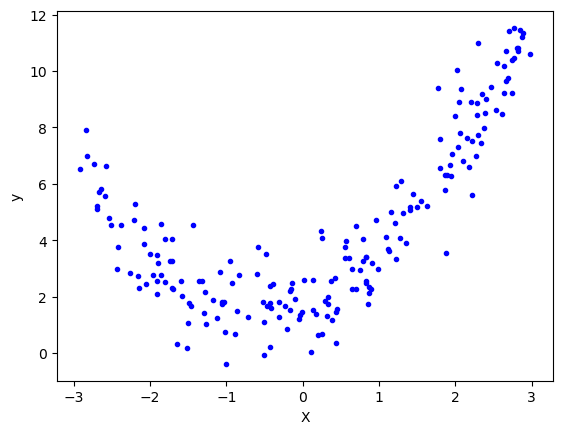

In [315]:
import matplotlib.pyplot as plt
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [317]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [319]:
# Applying linear regression
lr = LinearRegression()

In [321]:
lr.fit(X_train,y_train)

LinearRegression()

In [323]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.4595101469503443

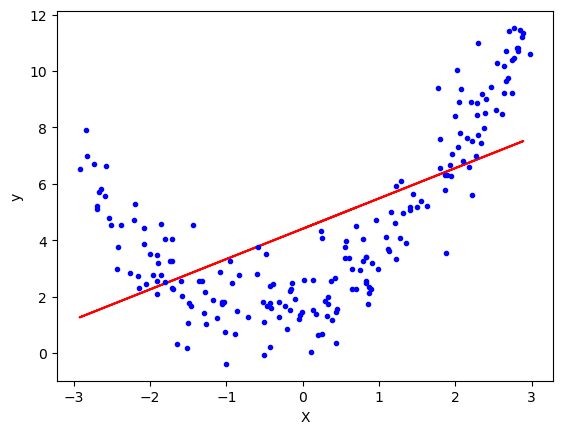

In [325]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [327]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [329]:
print(X_train)


[[ 0.70132258]
 [-2.19357344]
 [ 0.85312417]
 [ 0.20236514]
 [-1.90916009]
 [ 1.21564396]
 [ 2.53339444]
 [-0.58653397]
 [-2.6906663 ]
 [-2.92212184]
 [ 0.90790667]
 [-1.89391592]
 [ 1.40283452]
 [-1.80843133]
 [-2.53155972]
 [ 0.44605423]
 [ 0.64629622]
 [ 1.15008202]
 [-0.04205242]
 [ 2.2970411 ]
 [ 0.82729519]
 [-1.27919817]
 [ 2.01554751]
 [ 1.28777875]
 [-2.20332683]
 [ 0.32780092]
 [-0.05295319]
 [ 2.29941983]
 [-1.9659776 ]
 [-1.80453656]
 [-0.7156957 ]
 [-1.28728259]
 [ 2.37890495]
 [-1.3626051 ]
 [-1.0336836 ]
 [-1.58917264]
 [ 2.81895368]
 [-0.51745519]
 [ 2.38861636]
 [ 0.24718845]
 [-0.48227673]
 [ 2.84265323]
 [-2.59084559]
 [ 1.77436314]
 [ 1.21658978]
 [ 0.55132218]
 [ 0.24383033]
 [ 0.82398319]
 [ 2.88801863]
 [-0.88809461]
 [-2.00247907]
 [ 0.82565029]
 [-0.10607592]
 [-1.84983059]
 [-2.0720292 ]
 [ 0.70119927]
 [ 1.35847611]
 [ 0.78355463]
 [-2.73621571]
 [ 1.8582122 ]
 [-1.48834601]
 [-2.82670078]
 [ 1.79669491]
 [ 1.95659894]
 [ 2.27662027]
 [ 1.11879144]
 [-0.85532

In [333]:
print(X_train_trans)

[[ 1.00000000e+00  7.01322576e-01  4.91853356e-01]
 [ 1.00000000e+00 -2.19357344e+00  4.81176443e+00]
 [ 1.00000000e+00  8.53124170e-01  7.27820849e-01]
 [ 1.00000000e+00  2.02365139e-01  4.09516494e-02]
 [ 1.00000000e+00 -1.90916009e+00  3.64489224e+00]
 [ 1.00000000e+00  1.21564396e+00  1.47779023e+00]
 [ 1.00000000e+00  2.53339444e+00  6.41808740e+00]
 [ 1.00000000e+00 -5.86533971e-01  3.44022099e-01]
 [ 1.00000000e+00 -2.69066630e+00  7.23968516e+00]
 [ 1.00000000e+00 -2.92212184e+00  8.53879604e+00]
 [ 1.00000000e+00  9.07906670e-01  8.24294521e-01]
 [ 1.00000000e+00 -1.89391592e+00  3.58691751e+00]
 [ 1.00000000e+00  1.40283452e+00  1.96794469e+00]
 [ 1.00000000e+00 -1.80843133e+00  3.27042388e+00]
 [ 1.00000000e+00 -2.53155972e+00  6.40879463e+00]
 [ 1.00000000e+00  4.46054235e-01  1.98964380e-01]
 [ 1.00000000e+00  6.46296215e-01  4.17698798e-01]
 [ 1.00000000e+00  1.15008202e+00  1.32268866e+00]
 [ 1.00000000e+00 -4.20524197e-02  1.76840600e-03]
 [ 1.00000000e+00  2.29704110e+

In [335]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [337]:
y_pred = lr.predict(X_test_trans)

In [339]:
r2_score(y_test,y_pred)

0.8215010245643015

In [341]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.88814898 0.85335009]]
[1.89798767]


In [343]:
# generating testing data
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


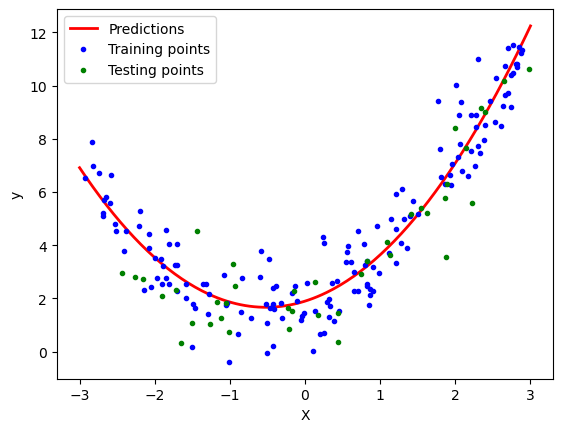

In [357]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [347]:
from sklearn.preprocessing impor

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

In [349]:
polynomial_regression(50)

NameError: name 'Pipeline' is not defined